In [1]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

In [2]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

<ipython-input-2-cde6ab162d36>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp = await fetch(URL)
dataset_part_2_csv = io.BytesIO((await resp.arrayBuffer()).to_py())
df=pd.read_csv(dataset_part_2_csv)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


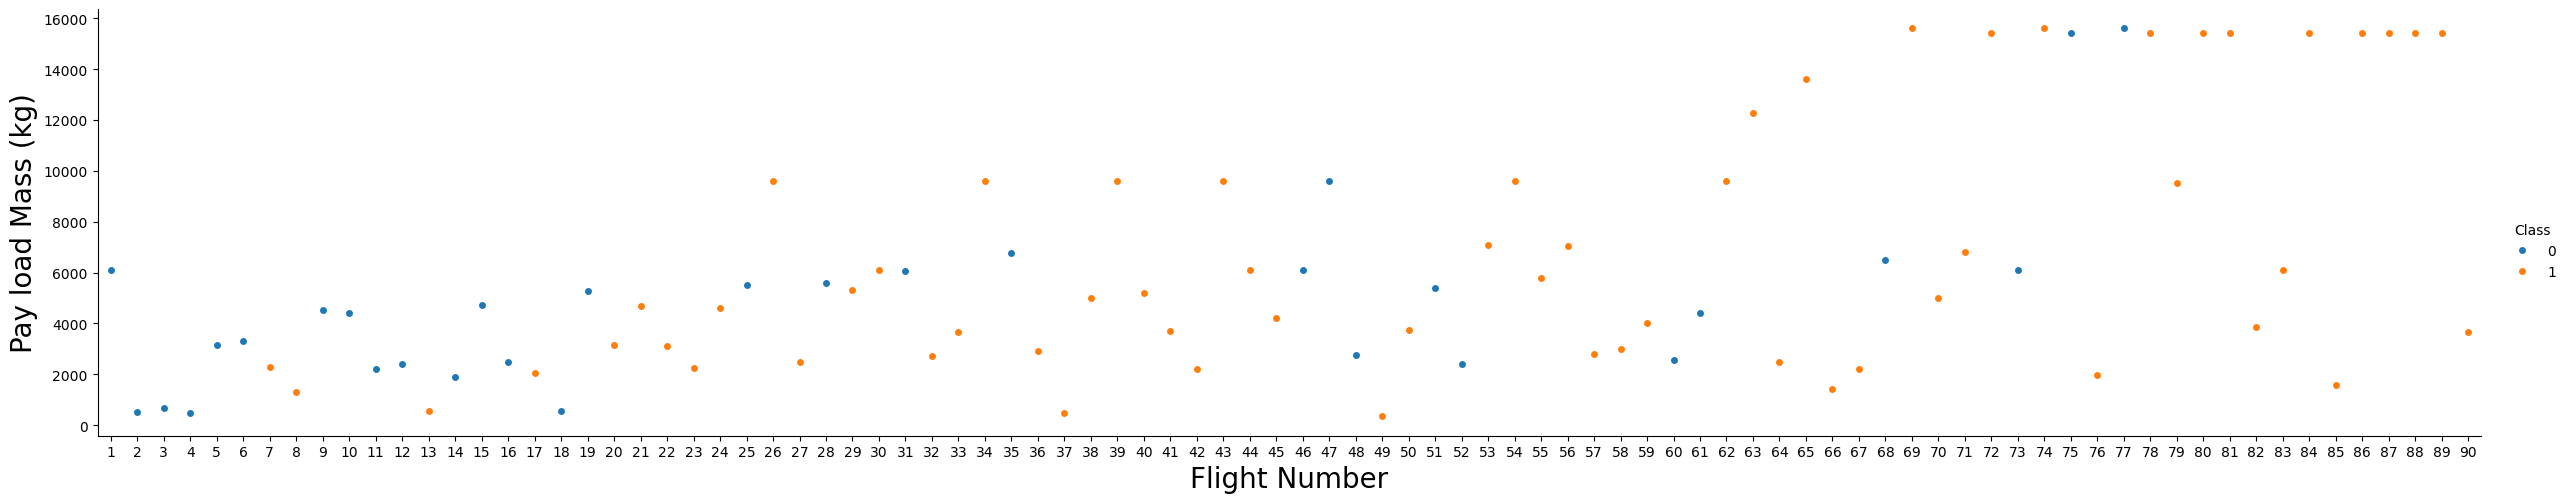

In [4]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

In [6]:
print(df.columns)

Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude',
       'Class'],
      dtype='object')


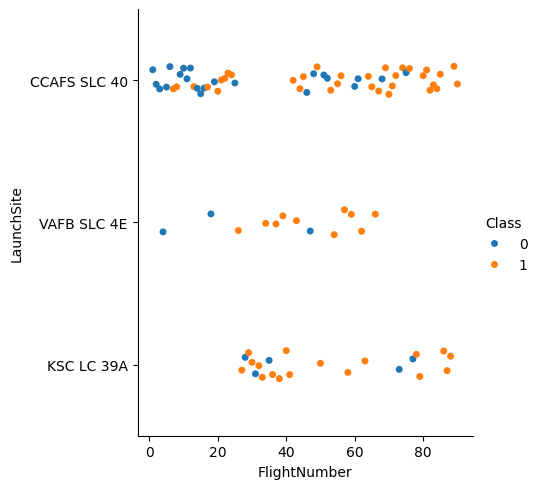

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# 假設你有一個 DataFrame 叫做 df，其中包含 FlightNumber、LaunchSite 和 class 列
sns.catplot(x='FlightNumber', y='LaunchSite', hue='Class', data=df, kind='strip')

# 顯示圖表
plt.show()

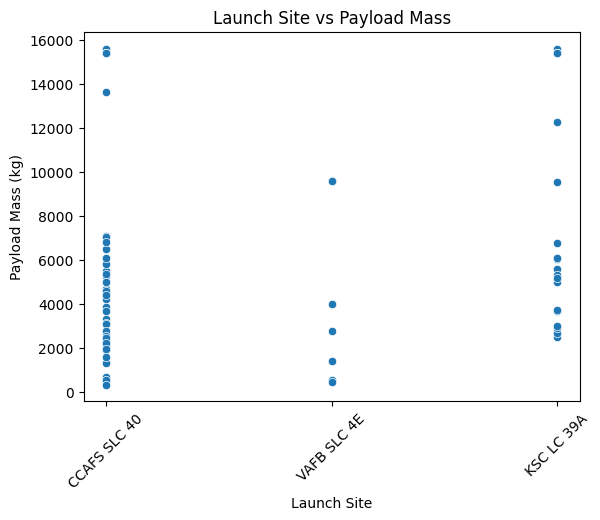

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# 假設您有一個 DataFrame 叫做 df，其中包含 LaunchSite 和 PayloadMass 列
sns.scatterplot(x='LaunchSite', y='PayloadMass', data=df)

# 顯示圖表
plt.title('Launch Site vs Payload Mass')
plt.xlabel('Launch Site')
plt.ylabel('Payload Mass (kg)')
plt.xticks(rotation=45)  # 如果發射場名稱較長，可以旋轉 x 軸標籤
plt.show()

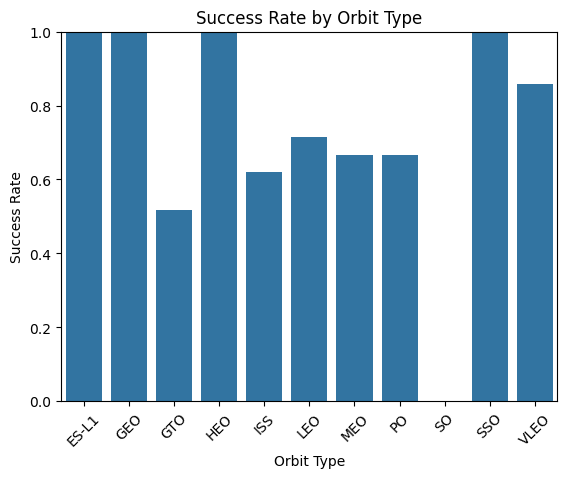

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# 假設 'Class' 列表示發射成功與否
# 計算每個軌道類型的成功率
success_rate = df.groupby('Orbit')['Class'].mean().reset_index()

# 繪製長條圖
sns.barplot(x='Orbit', y='Class', data=success_rate)

# 顯示圖表
plt.title('Success Rate by Orbit Type')
plt.xlabel('Orbit Type')
plt.ylabel('Success Rate')
plt.xticks(rotation=45)  # 如果軌道類型名稱較長，可以旋轉 x 軸標籤
plt.ylim(0, 1)  # 設置 y 軸範圍為 0 到 1
plt.show()

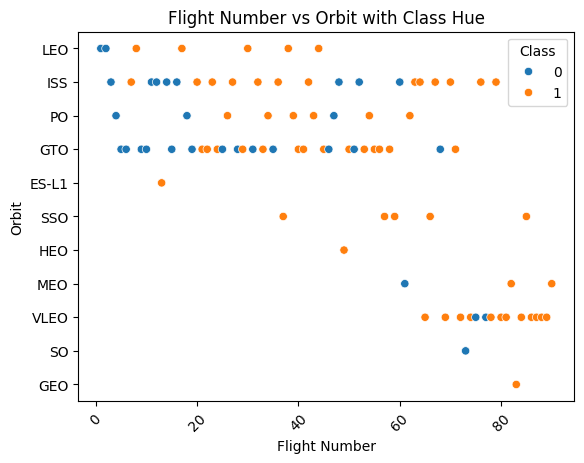

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# 假設您有一個 DataFrame 叫做 df，其中包含 FlightNumber、Orbit 和 Class 列
sns.scatterplot(x='FlightNumber', y='Orbit', hue='Class', data=df)

# 顯示圖表
plt.title('Flight Number vs Orbit with Class Hue')
plt.xlabel('Flight Number')
plt.ylabel('Orbit')
plt.xticks(rotation=45)  # 如果軌道名稱較長，可以旋轉 x 軸標籤
plt.show()

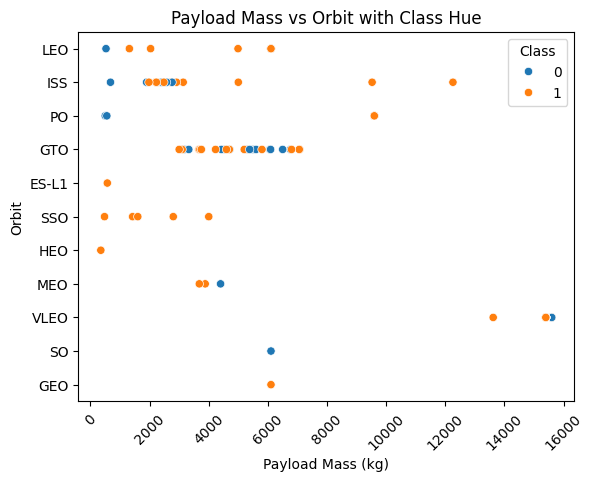

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# 假設您有一個 DataFrame 叫做 df，其中包含 PayloadMass、Orbit 和 Class 列
sns.scatterplot(x='PayloadMass', y='Orbit', hue='Class', data=df)

# 顯示圖表
plt.title('Payload Mass vs Orbit with Class Hue')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Orbit')
plt.xticks(rotation=45)  # 如果軌道名稱較長，可以旋轉 x 軸標籤
plt.show()

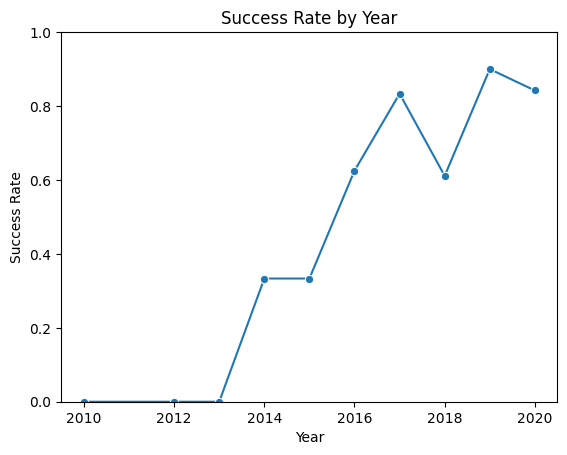

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 假設您有一個 DataFrame 叫做 df，其中包含 Date 和 Class 列
# 首先，從 Date 列中提取年份
df['Year'] = pd.to_datetime(df['Date']).dt.year

# 計算每年的成功率
yearly_success_rate = df.groupby('Year')['Class'].mean().reset_index()

# 繪製折線圖
sns.lineplot(x='Year', y='Class', data=yearly_success_rate, marker='o')

# 顯示圖表
plt.title('Success Rate by Year')
plt.xlabel('Year')
plt.ylabel('Success Rate')
plt.ylim(0, 1)  # 設置 y 軸範圍為 0 到 1
plt.show()

In [13]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004
